In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
# for converting currency to int
from decimal import Decimal
from re import sub

In [2]:
#input_file = "data.csv"
input_file= os.path.join('data.csv')
data_df = pd.read_csv(input_file)

In [3]:
new_df=data_df.drop([ 'Release Clause','Loaned From', 'Joined'], axis='columns')
new_df.drop(new_df.columns[26:52], axis=1, inplace=True)
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [14]:
leftright_pd = data_df[["Preferred Foot","Dribbling", "BallControl"]]
left_pd = leftright_pd.loc[leftright_pd["Preferred Foot"]== "Left", :]
right_pd = leftright_pd.loc[leftright_pd["Preferred Foot"]=="Right", :]
len(right_pd)

13948

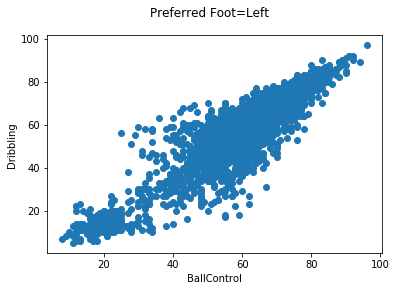

In [11]:
fig, ax=plt.subplots()
fig.suptitle("Preferred Foot=Left")
ax.scatter(left_pd["BallControl"], left_pd["Dribbling"], marker="o")
ax.set_xlabel("BallControl")
ax.set_ylabel("Dribbling")
plt.savefig("Left_foot.png")

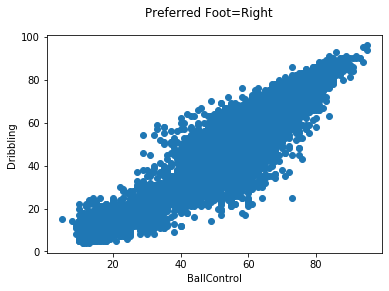

In [9]:
fig, ax=plt.subplots()
fig.suptitle("Preferred Foot=Right")
ax.scatter(right_pd["BallControl"], right_pd["Dribbling"], marker="o")
ax.set_xlabel("BallControl")
ax.set_ylabel("Dribbling")
plt.savefig("Right_foot.png")

In [7]:
# changing Wage to int
wage_value=[]

for wage in new_df['Wage']:
    string_val = sub(r'[^\d.]', '000', wage)
    wage_value.append(string_val)

new_df['Wage'] = wage_value
new_df['Wage'] = new_df['Wage'].astype(int)

In [8]:
new_summary = new_df[["ID", "Age", "Wage"]]
new_summary_df = pd.DataFrame(new_summary.groupby("Age").count())
new_summary_df = new_summary_df.rename(columns={"ID":"Count"})
new_summary_df = new_summary_df.drop(["Wage"], axis=1)
new_summary_df["Percent Age"] =(round(100*new_summary_df["Count"]/sum(new_summary_df["Count"]), 2)).astype(str) + "%"
new_summary_df["Wage by Age totally"] = new_summary.groupby("Age")["Wage"].sum()
new_summary_df["Average Wage in Age"] = new_summary.groupby("Age")["Wage"].sum()/new_summary_df["Count"]
new_summary_df

,Count,Percent Age,Wage by Age totally,Average Wage in Age
Age,,,,
16,42,0.23%,49000,1166.666667
17,289,1.59%,619000,2141.868512
18,732,4.02%,1632000,2229.508197
19,1024,5.62%,2823000,2756.835938
20,1240,6.81%,5897000,4755.645161
21,1423,7.82%,8782000,6171.468728
22,1340,7.36%,10577000,7893.283582
23,1332,7.32%,11504000,8636.636637
24,1358,7.46%,13441000,9897.643594


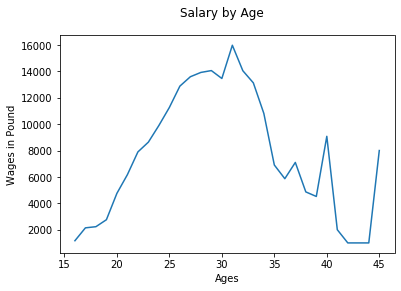

In [12]:
fig, ax=plt.subplots()
fig.suptitle("Salary by Age")
ax.plot(new_summary_df.index, new_summary_df["Average Wage in Age"])
ax.set_xlabel("Ages")
ax.set_ylabel("Wages in Pound")
plt.savefig("Wages by Ages.png")

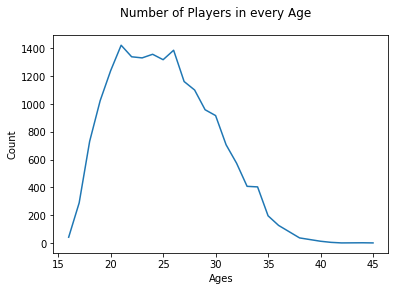

In [13]:
fig, ax=plt.subplots()
fig.suptitle("Number of Players in every Age")
ax.plot(new_summary_df.index, new_summary_df["Count"])
ax.set_xlabel("Ages")
ax.set_ylabel("Count")
plt.savefig("Number of Players in every Age.png")

In [11]:
# 1. Create bins for player age groups and correlate with salary/wages
age_bins = [15, 20, 25, 30, 35,40,50]
age_groups = ["<20", "21-25","26-30","31-35","36-40",">40"]

In [12]:
age_range_df = pd.DataFrame(new_df)
age_range_df['Age Range'] = pd.cut(age_range_df["Age"],age_bins,labels = age_groups)
age_range_df = age_range_df[['ID','Name','Age','Age Range','Wage','Value']]

age_range_df.head()

,ID,Name,Age,Age Range,Wage,Value
0,158023,L. Messi,31,31-35,565000,€110.5M
1,20801,Cristiano Ronaldo,33,31-35,405000,€77M
2,190871,Neymar Jr,26,26-30,290000,€118.5M
3,193080,De Gea,27,26-30,260000,€72M
4,192985,K. De Bruyne,27,26-30,355000,€102M


In [13]:
age_analysis_df = pd.DataFrame(age_range_df.groupby(['Age Range']).count())
age_analysis_df["Percent Age"] =(round(100*age_analysis_df["ID"]/sum(age_analysis_df["ID"]), 2)).astype(str) + "%"
age_analysis_df['Total Wage'] = age_range_df.groupby(['Age Range'])[['Wage']].sum()
age_analysis_df = age_analysis_df.rename(columns={"ID":"Count"})
age_analysis_df = age_analysis_df.drop(["Name", "Age", "Wage", "Value"], axis=1)
age_analysis_df["Average Wage"] = age_analysis_df["Total Wage"]/age_analysis_df["Count"]

In [14]:
age_analysis_df

,Count,Percent Age,Total Wage,Average Wage
Age Range,,,,
<20,3327,18.27%,11020000,3312.293357
21-25,6772,37.19%,59162000,8736.266982
26-30,5526,30.35%,74802000,13536.373507
31-35,2289,12.57%,30435000,13296.199214
36-40,284,1.56%,1738000,6119.718310
>40,9,0.05%,21000,2333.333333


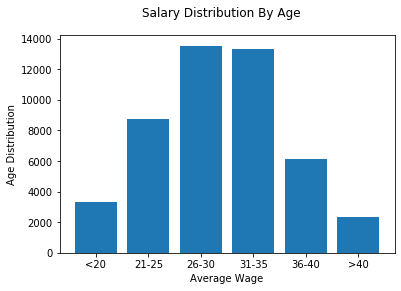

In [15]:
fig, ax=plt.subplots()
fig.suptitle("Salary Distribution By Age")
ax.bar(age_analysis_df.index, age_analysis_df["Average Wage"])
ax.set_xlabel("Average Wage")
ax.set_ylabel("Age Distribution")
plt.savefig("Salary Distribution By Age.png")

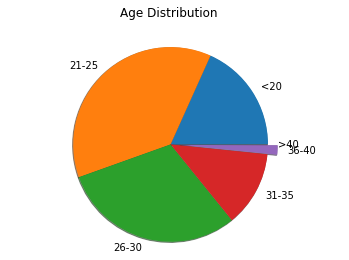

In [16]:
fig, ax=plt.subplots()
fig.suptitle("Age Distribution")
ax.pie(age_analysis_df["Count"], labels=age_groups,explode=[0, 0, 0, 0, .3, 0], shadow=True, radius=3)
plt.axis("equal")
plt.savefig("Age Distribution.png")

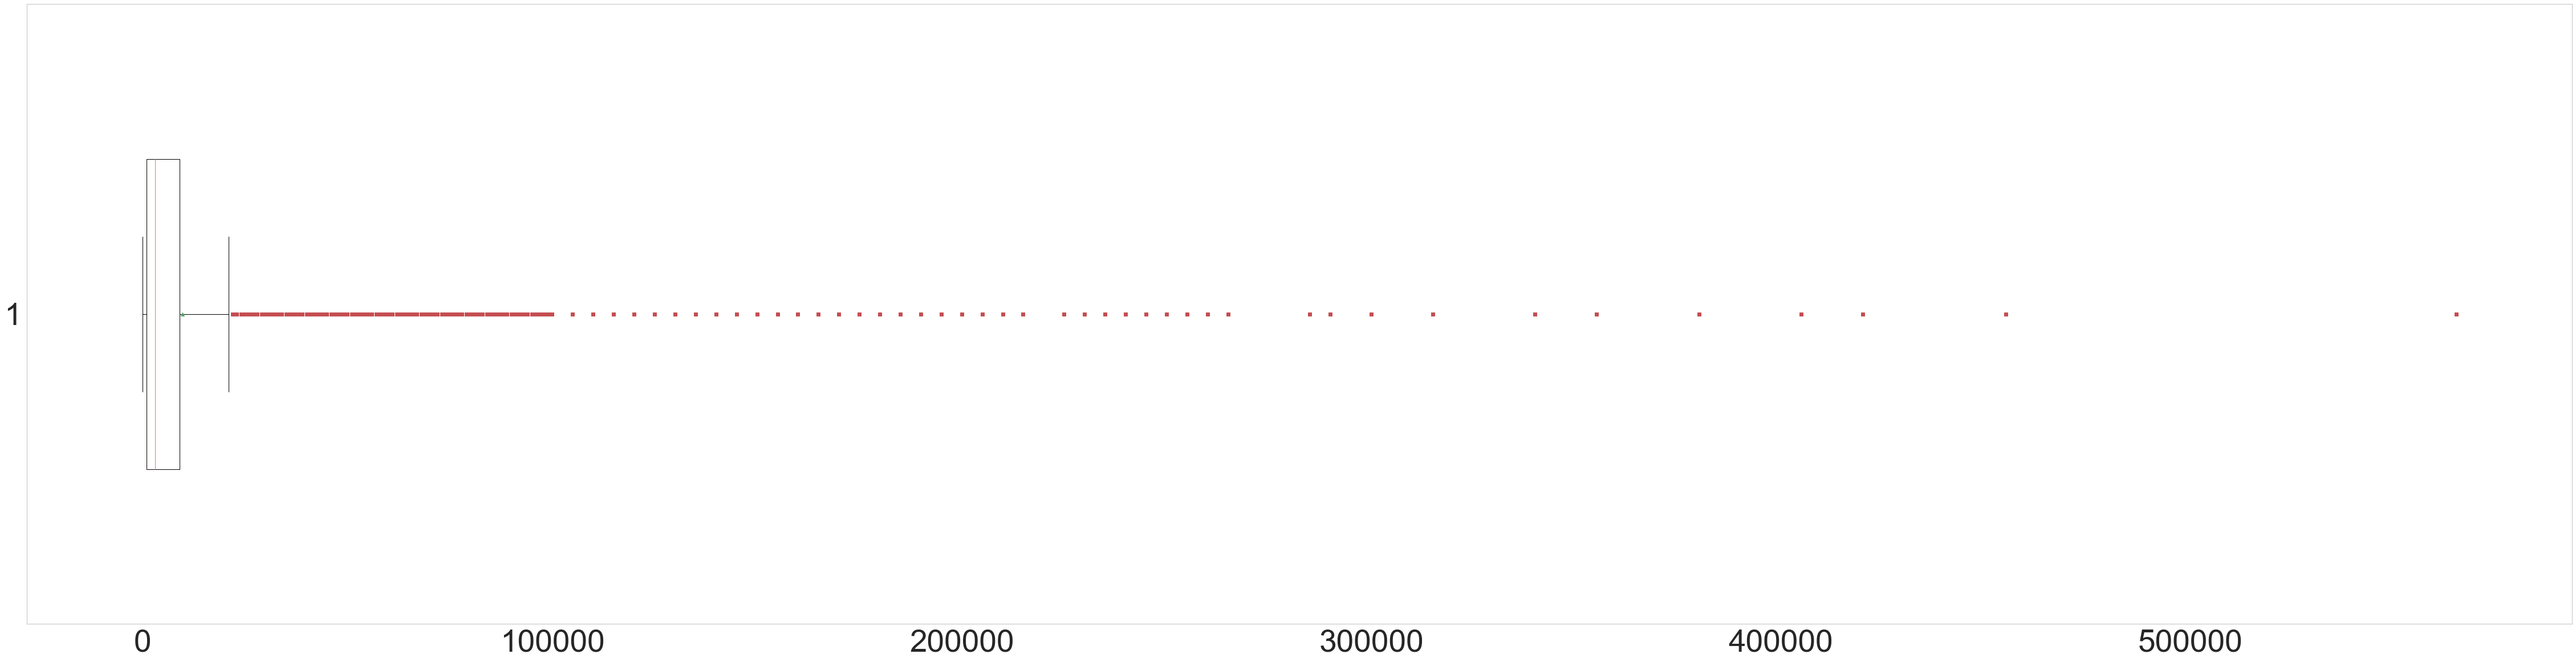

In [17]:
# Create box plot
#plt.boxplot(new_df['Wage'], showmeans=True)
sns.set(rc={'figure.figsize':(80,20)}, font_scale=5, style='whitegrid')
plt.boxplot(new_df['Wage'], 0, 'rs', 0, showmeans=True, widths=.5)
plt.grid()
plt.savefig("wage distribution.png")
plt.show()